In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import scipy 
import matplotlib.pyplot as plt
from scipy.stats import norm

import seaborn as sns
warnings.filterwarnings('ignore')
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 

In [119]:
df = pd.read_excel("CanadaCarEmissions.xlsx")
df1 = df.copy()

In [4]:
df.head(20)

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256
7,2022,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,25,261
8,2022,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205
9,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217


In [39]:
df.info()
print("No of rows and columns are : ",df.shape,df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30757 entries, 0 to 30756
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     30757 non-null  int64  
 1   MAKE                           30757 non-null  object 
 2   MODEL(# = high output engine)  30710 non-null  object 
 3   VEHICLE CLASS                  30757 non-null  object 
 4   ENGINE SIZE (L)                30757 non-null  float64
 5   CYLINDERS                      30757 non-null  int64  
 6   TRANSMISSION                   30757 non-null  object 
 7   FUEL TYPE                      30757 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100)  30757 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100)   30757 non-null  float64
 10  COMB (L/100 km)                30757 non-null  float64
 11  COMB (mpg)                     30757 non-null  int64  
 12  CO2 EMISSIONS (g/km)           30757 non-null 

# EDA

1. Change the column data type
2. Drop the first row of the Dataset as it is Null
3. Handling the Missing Values
4. Handling Outliers

### Missing values

In [7]:
df.isna().sum()

MODEL YEAR                        0
MAKE                              0
MODEL(# = high output engine)    47
VEHICLE CLASS                     0
ENGINE SIZE (L)                   0
CYLINDERS                         0
TRANSMISSION                      0
FUEL TYPE                         0
FUEL CONSUMPTION CITY (L/100)     0
FUEL CONSUMPTION HWY (L/100)      0
COMB (L/100 km)                   0
COMB (mpg)                        0
CO2 EMISSIONS (g/km)              0
dtype: int64

In [8]:
df.corr()



,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
MODEL YEAR,1.000000,-0.042602,-0.030769,-0.229738,-0.229553,-0.232796,0.235307,-0.258731
ENGINE SIZE (L),-0.042602,1.000000,0.906882,0.809194,0.725795,0.789736,-0.733765,0.791530
CYLINDERS,-0.030769,0.906882,1.000000,0.772297,0.660593,0.741901,-0.690355,0.749418
FUEL CONSUMPTION CITY (L/100),-0.229738,0.809194,0.772297,1.000000,0.942882,0.992507,-0.925076,0.935622
FUEL CONSUMPTION HWY (L/100),-0.229553,0.725795,0.660593,0.942882,1.000000,0.976254,-0.887992,0.926233
COMB (L/100 km),-0.232796,0.789736,0.741901,0.992507,0.976254,1.000000,-0.924102,0.944886
COMB (mpg),0.235307,-0.733765,-0.690355,-0.925076,-0.887992,-0.924102,1.000000,-0.901620
CO2 EMISSIONS (g/km),-0.258731,0.791530,0.749418,0.935622,0.926233,0.944886,-0.901620,1.000000


### Unique Values

In [9]:
df.nunique()

MODEL YEAR                         28
MAKE                               90
MODEL(# = high output engine)    4698
VEHICLE CLASS                      32
ENGINE SIZE (L)                    63
CYLINDERS                           9
TRANSMISSION                       30
FUEL TYPE                           5
FUEL CONSUMPTION CITY (L/100)     236
FUEL CONSUMPTION HWY (L/100)      155
COMB (L/100 km)                   196
COMB (mpg)                         59
CO2 EMISSIONS (g/km)              375
dtype: int64

### Column Cleaning

In [120]:
df.columns = (
 df
 .columns
 .str.replace(" ",'_', regex=False)
  .str.replace(" ",'_', regex=False)
)

df.columns

Index(['MODEL_YEAR', 'MAKE', 'MODEL(#_=_high_output_engine)', 'VEHICLE_CLASS',
       'ENGINE_SIZE_(L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL_TYPE',
       'FUEL_CONSUMPTION_CITY_(L/100)', 'FUEL_CONSUMPTION_HWY_(L/100)',
       'COMB_(L/100_km)', 'COMB_(mpg)', 'CO2_EMISSIONS_(g/km)'],
      dtype='object')

### Renaming the cloumns

In [121]:
new_names = {
    "MODEL(#_=_high_output_engine)": "MODEL",
    "FUEL_CONSUMPTION_CITY_(L/100)": "FUEL_CONSUMPTION_CITY",
    "FUEL_CONSUMPTION_HWY_(L/100)":"FUEL_CONSUMPTION_HWY",
    'COMB_(L/100_km)':"COMB", 'COMB_(mpg)':"COMB_mpg", 'CO2_EMISSIONS_(g/km)':"CO2_EMISSIONS"
    # Add more mappings as needed
}

# Rename the columns using the rename() method
df = df.rename(columns=new_names)

In [122]:
df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE_(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,COMB,COMB_mpg,CO2_EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [123]:
temp = []
temp2 = []
for i in df:
    if df[i].dtype=="float64" or df[i].dtype=="int64":
        temp.append(df[i])
    else:
        temp2.append(df[i])
    
df_cat = pd.DataFrame(temp2)
df_num = pd.DataFrame(temp)
df_num = df_num.T
df_cat = df_cat.T

### Ploting the numerical data

In [124]:
##drop the cylinders from numerical data but not from the whole data

In [125]:
df_num.drop(['CYLINDERS'], axis=1, inplace = True)

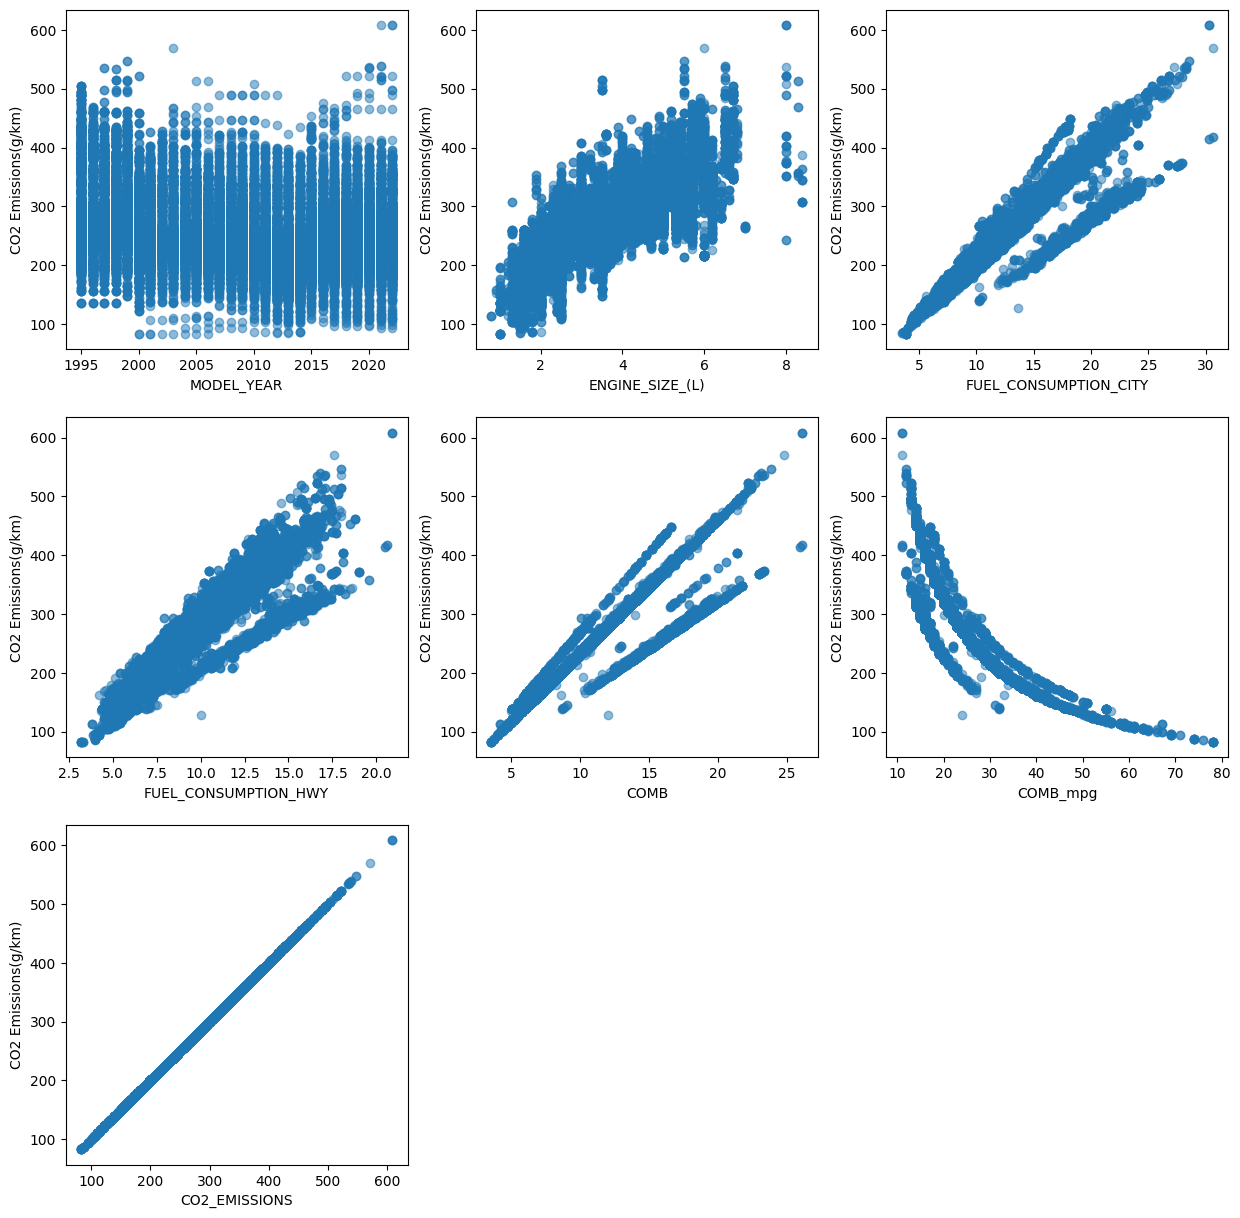

In [46]:
plt.figure(figsize = (15,15))

for  i in enumerate(df_num):
    
    plt.subplot(3,3,i[0]+1)
    x = df_num[i[1]]
    y=df_num['CO2_EMISSIONS']

    plt.xlabel(i[1])
    plt.ylabel("CO2 Emissions(g/km)")
  
    plt.scatter(x, y , alpha=0.5) 

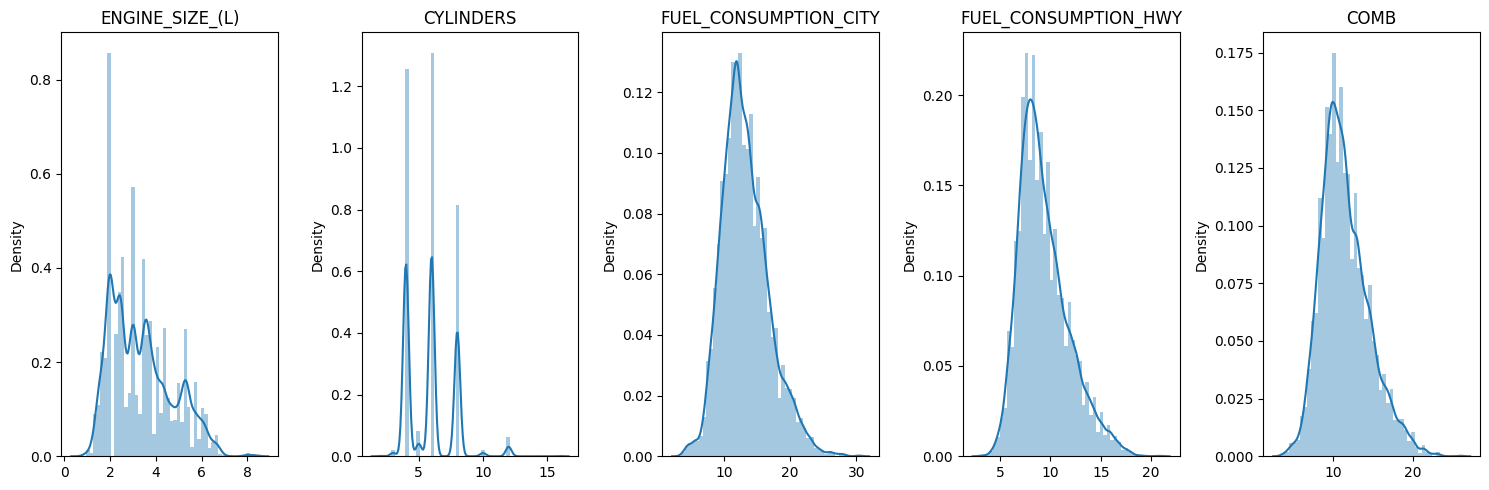

In [47]:
col=[ 'ENGINE_SIZE_(L)', 'CYLINDERS',
       'FUEL_CONSUMPTION_CITY','FUEL_CONSUMPTION_HWY', 'COMB']
fig = plt.figure(figsize=(15,5))

for i in range(len(col)):
    plt.subplot(1,5,i+1)
    plt.title(col[i])
    sns.distplot(df,x=df[col[i]])
plt.tight_layout()
plt.show()

### Boxplot to see if there are outliers

### Outliers

In [81]:
df.describe()

,MODEL_YEAR,ENGINE_SIZE_(L),CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,COMB,COMB_mpg,CO2_EMISSIONS
count,30757.000000,30757.000000,30757.000000,30757.000000,30757.000000,30757.000000,30757.000000,30757.000000
mean,2007.780083,3.355503,5.841044,13.248356,9.343164,11.491748,26.317424,261.782131
std,8.317155,1.342641,1.772152,3.569031,2.459721,3.029238,7.188396,65.020724
min,1995.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2000.000000,2.300000,4.000000,10.800000,7.600000,9.400000,21.000000,216.000000
50%,2008.000000,3.000000,6.000000,12.800000,8.900000,11.000000,26.000000,253.000000
75%,2015.000000,4.300000,8.000000,15.400000,10.700000,13.300000,30.000000,301.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [126]:
#Outlier function
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   
    return outliers

outliers = find_outliers_IQR(df["CO2_EMISSIONS"])

print ("CO2 EMISSIONS (g/km)")

df["CO2_EMISSIONS"].describe()

CO2 EMISSIONS (g/km)


count    30757.000000
mean       261.782131
std         65.020724
min         83.000000
25%        216.000000
50%        253.000000
75%        301.000000
max        608.000000
Name: CO2_EMISSIONS, dtype: float64

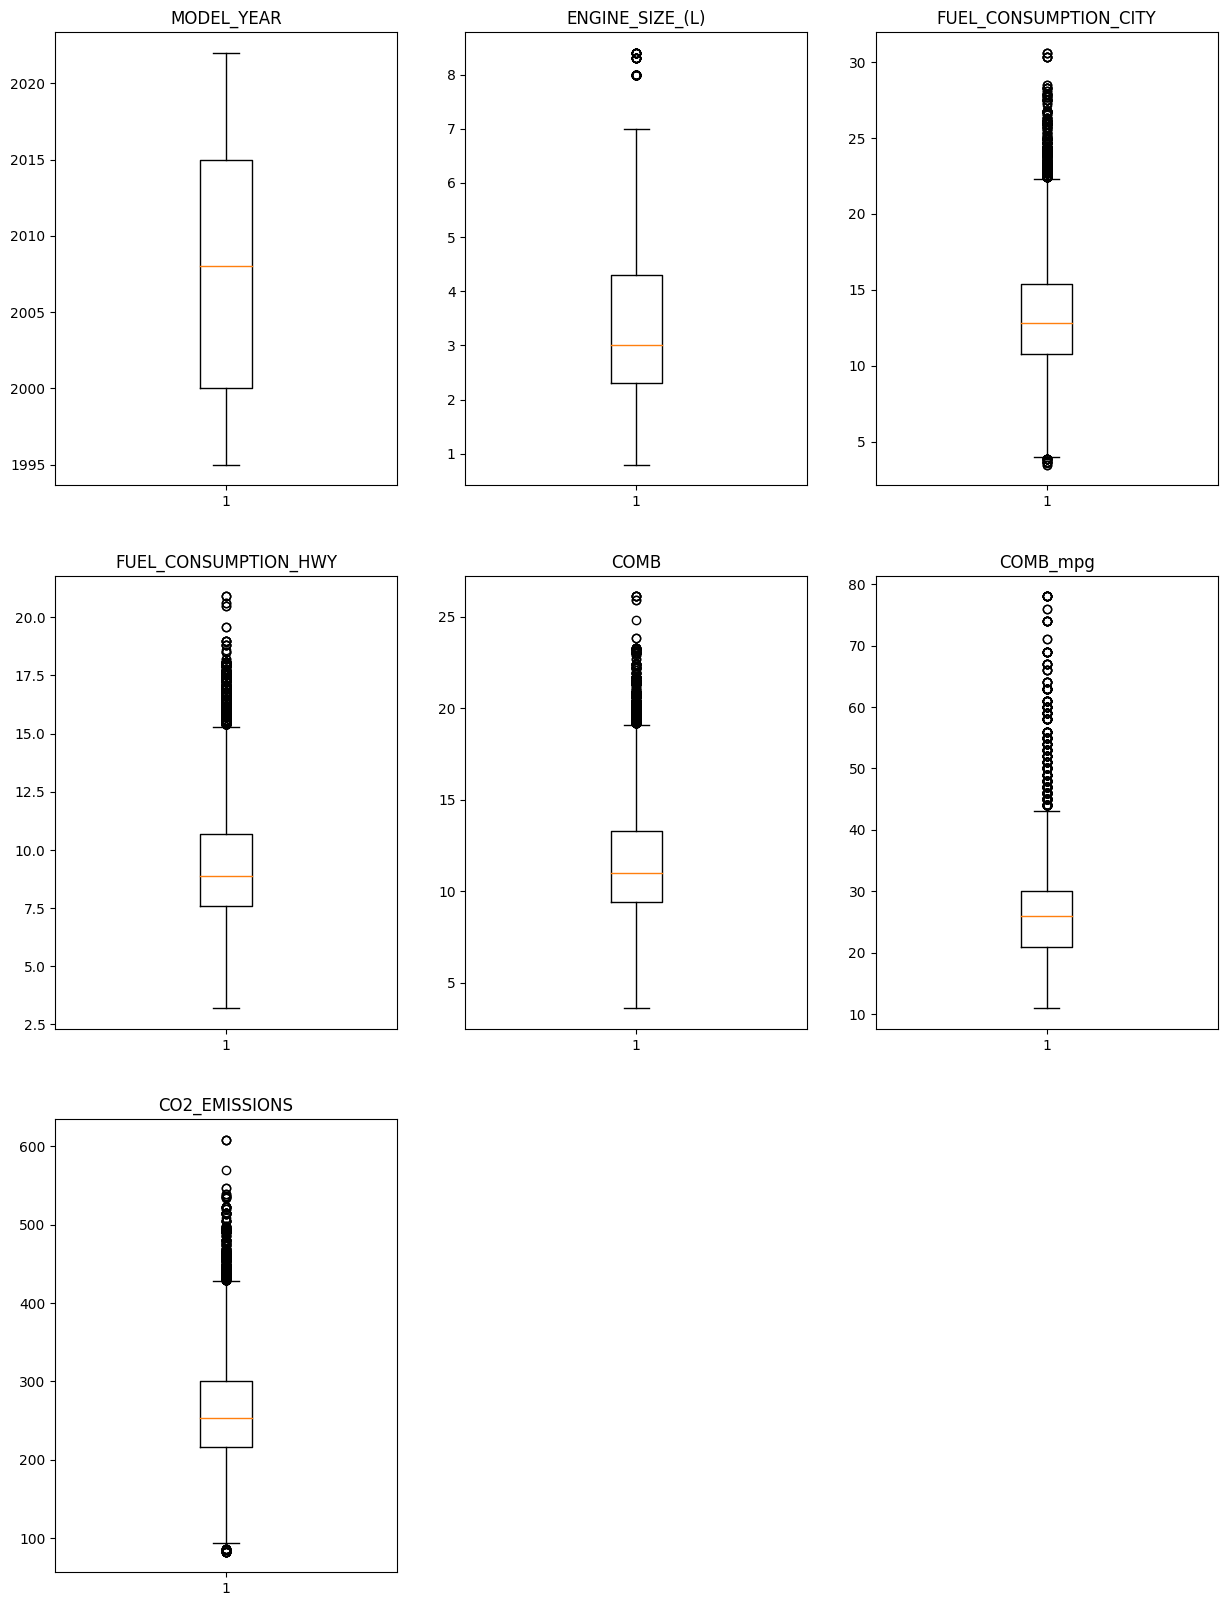

In [83]:

plt.figure(figsize = (15,20))
for i in enumerate(df_num):
    plt.subplot(3,3,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_num[i[1]])
    

### Fuel_ConsumptionComb(mpg) is not logic to be like that in the plot

Text(0, 0.5, 'CO2 Emissiom')

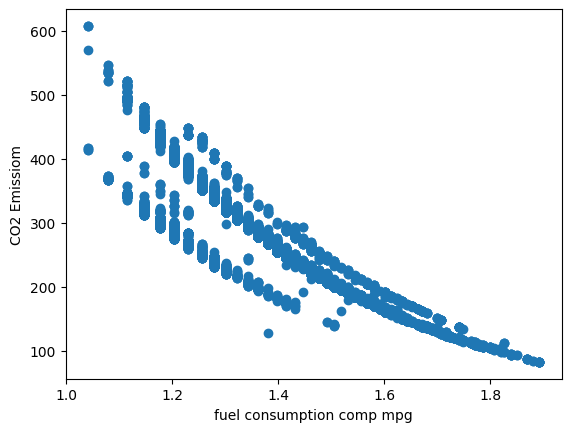

In [53]:
plt.scatter(np.log10(df['COMB_mpg']) , df['CO2_EMISSIONS'])
plt.xlabel("fuel consumption comp mpg")
plt.ylabel("CO2 Emissiom")

#### CHECKING ITS CORRELATION 

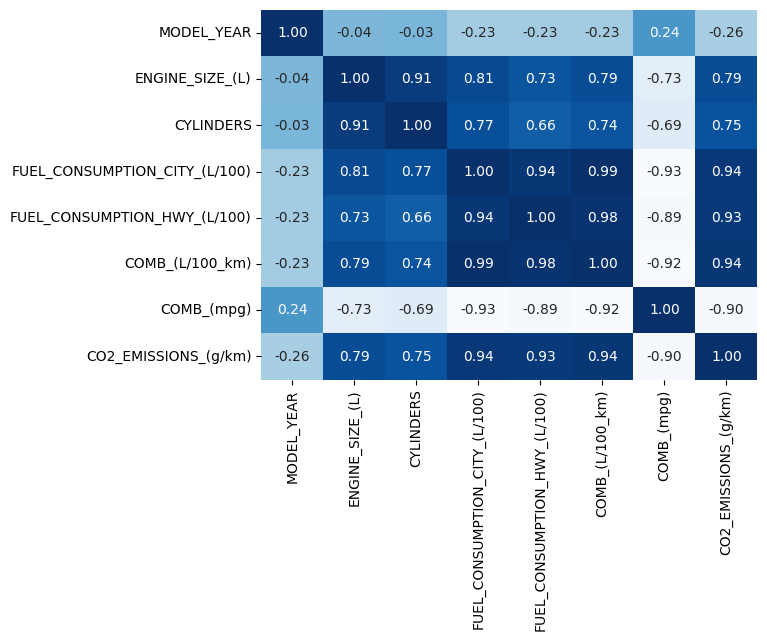

In [20]:
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.2f');

In [46]:
corr_mpg = df['COMB_mpg'].corr(df['CO2_EMISSIONS'])
corr_mpg

-0.901619596430692

#### DROPPING COMB(MPG)

In [127]:
df.drop(['COMB_mpg'], axis=1, inplace = True)
df_num.drop(['COMB_mpg'], axis=1, inplace = True)

### Effect of Vehical Class on CO2 Emission

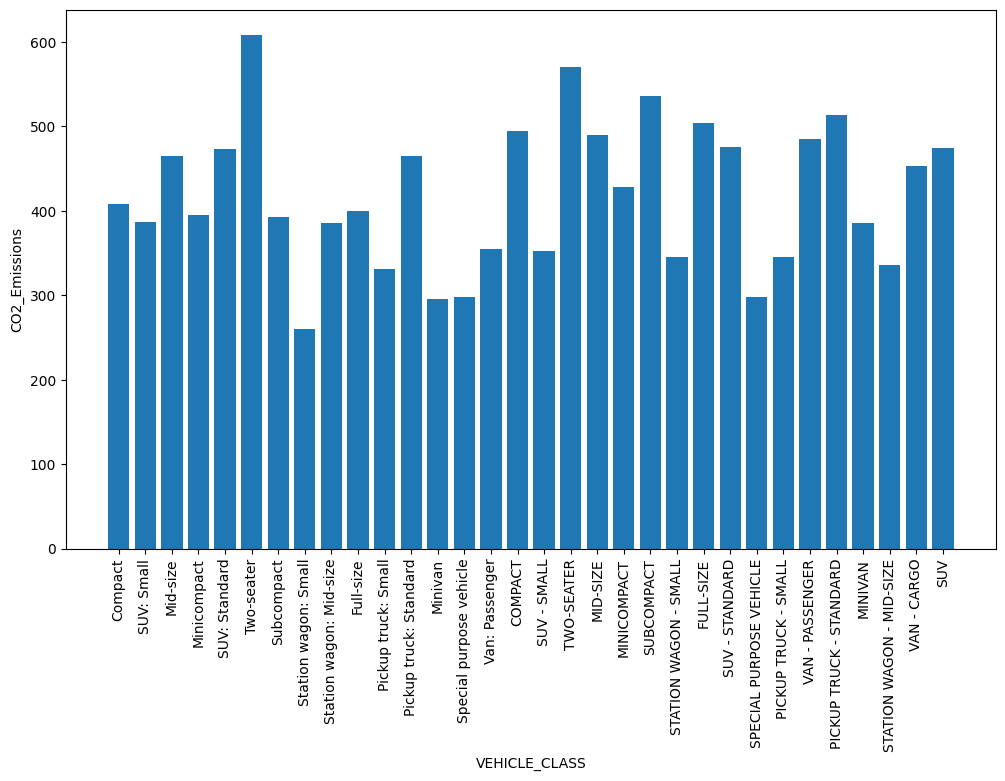

In [56]:
vehicle_classes = df['VEHICLE_CLASS'].unique()
vehicle_classes_count =range(len(vehicle_classes))

plt.figure(figsize=(12,7))

plt.xlabel('VEHICLE_CLASS')
plt.ylabel('CO2_Emissions')

plt.bar(df['VEHICLE_CLASS'] , df['CO2_EMISSIONS'] )
plt.xticks(vehicle_classes_count ,vehicle_classes, rotation = 'vertical')
plt.show()

##### We can see that Two_seater has highest CO2 Emission

N = natural gas

E = ethanol

D = diesel

X = gasoline

Z = premium gasoline

#### Data preprocessing

In [128]:
df.drop(['MODEL'], axis=1, inplace = True)
df.drop(['MAKE'], axis=1, inplace = True)


#as the combination betwween the hwy and the city has its own column
df.drop(['FUEL_CONSUMPTION_CITY'], axis=1, inplace = True)
df.drop(['FUEL_CONSUMPTION_HWY'], axis=1, inplace = True)

df_num.drop(['FUEL_CONSUMPTION_CITY'], axis=1, inplace = True)
df_num.drop(['FUEL_CONSUMPTION_HWY'], axis=1, inplace = True)

In [12]:
df.head()

,MODEL_YEAR,VEHICLE_CLASS,ENGINE_SIZE_(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,COMB,CO2_EMISSIONS
0,2022,Compact,2.4,4,AM8,Z,8.6,200
1,2022,SUV: Small,3.5,6,AS10,Z,11.2,263
2,2022,SUV: Small,2.0,4,AS10,Z,9.9,232
3,2022,SUV: Small,2.0,4,AS10,Z,10.3,242
4,2022,Compact,2.0,4,AS10,Z,9.8,230


### using quantile function to remove outliers

In [129]:
min_list = []
max_list = []
for  i in enumerate(df_num):
    min , max = df_num[i[1]].quantile([0.01,0.99])
    min_list.append(min)
    max_list.append(max)

In [130]:
for  i in enumerate(df_num):
    print(i[0])
    df =df[ df[i[1]] > min_list[i[0]] ]
    df =df[ df[i[1]] < max_list[i[0]] ]

0
1
2
3


In [131]:
print("the length of the original : " , len(df1))
print("the length after removing the outliers : " , len(df))

the length of the original :  30757
the length after removing the outliers :  26779


In [132]:
from sklearn.preprocessing import OneHotEncoder  
ohe = OneHotEncoder(sparse=False)

# checking by mean and std

In [17]:
df.describe()

,MODEL_YEAR,ENGINE_SIZE_(L),CYLINDERS,COMB,CO2_EMISSIONS
count,26779.000000,26779.000000,26779.000000,26779.000000,26779.000000
mean,2007.956048,3.342836,5.821427,11.366959,258.864073
std,7.644999,1.249737,1.672178,2.691880,57.519514
min,1996.000000,1.500000,3.000000,6.000000,139.000000
25%,2001.000000,2.300000,4.000000,9.400000,217.000000
50%,2008.000000,3.000000,6.000000,10.900000,251.000000
75%,2015.000000,4.200000,6.000000,13.100000,297.000000
max,2021.000000,6.400000,12.000000,19.900000,435.000000


### Dealing with the catigorical attributes

In [133]:
df=pd.concat([df,pd.get_dummies(df['VEHICLE_CLASS'],prefix='Vehicle Class',drop_first=True)],axis=1)
df.drop(['VEHICLE_CLASS'], axis=1, inplace = True)
df=pd.concat([df,pd.get_dummies(df['TRANSMISSION'],prefix='Transmission',drop_first=True)],axis=1)
df.drop(['TRANSMISSION'], axis=1, inplace = True)
df=pd.concat([df,pd.get_dummies(df['FUEL_TYPE'],prefix='Fuel Type',drop_first=True)],axis=1)
df.drop(['FUEL_TYPE'], axis=1, inplace = True)

In [134]:
df

,MODEL_YEAR,ENGINE_SIZE_(L),CYLINDERS,COMB,CO2_EMISSIONS,Vehicle Class_Compact,Vehicle Class_FULL-SIZE,Vehicle Class_Full-size,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,...,Transmission_AV7,Transmission_AV8,Transmission_M4,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
955,2021,2.4,4,8.6,199,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
956,2021,3.5,6,11.0,256,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
957,2021,2.0,4,9.9,232,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
958,2021,2.0,4,10.3,242,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
959,2021,2.0,4,9.8,230,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30752,2001,3.4,6,11.9,274,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
30753,2001,3.6,6,13.1,301,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
30754,2001,3.6,6,13.0,299,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
30755,2001,2.7,6,11.3,260,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Normalizing the df using minmax scaler

In [135]:
import sklearn.preprocessing as skp
mms = skp.MinMaxScaler()

In [136]:
for  i in enumerate(df_num):
    df[i[1]] = mms.fit_transform(df[[i[1]]])
    

## Train and Test Split of Data

In [174]:
from sklearn.model_selection import train_test_split
df2=df.copy()
X = df2.drop(['CO2_EMISSIONS'], axis= 1)
y = df2["CO2_EMISSIONS"]
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
#X["ENGINE_SIZE_(L)"]=X["ENGINE_SIZE_(L)"].map(lambda x:round(x,2))
#X["CYLINDERS"]=X["CYLINDERS"].map(lambda x:round(x,2))
#X["Fuel Consumption Comb (L/100 km)"]=X["Fuel Consumption Comb (L/100 km)"].map(lambda x:round(x,2))


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=2)

## Feature Scaling

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [139]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18745, 67)
(18745,)
(8034, 67)
(8034,)


# Regression Algorithms

## 1. Linear regression

In [140]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.score(X_test,y_test)

0.9961297543922037

In [141]:
from sklearn.metrics import mean_squared_error
#Predicting using model and calculating the error
y_pred = linear_reg.predict(X_test)
print("Error between predicted and actual: ",mean_squared_error(y_pred, y_test))

Error between predicted and actual:  0.00014784157857969791


In [185]:
linear_reg.fit(X_train, y_train)

# Make predictions on the test data and calculate the mean squared error
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error and the coefficients of the linear regression model
print('Mean Squared Error:', mse)
print('Coefficients:', linear_reg.coef_)
# Calculate adjusted R2
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R2:", r2)
print("Adjusted R2:", adj_r2)


Mean Squared Error: 0.00014785132071231297
Coefficients: [ 6.11915162e-03 -6.36219942e-03  1.36330696e-03  1.08236733e+00
  5.39075071e-03  3.32977387e-03  1.20272111e-02  1.48116245e-03
 -3.56127621e-04  1.25381729e-03  7.39918336e-03  7.18419596e-03
  9.50744535e-03  1.61491139e-03 -2.05756338e-03  1.43619260e-02
  1.09397602e-02  7.66028363e-03 -2.31742414e-04 -1.70795975e-03
 -2.05583586e-04 -9.89539107e-04  3.04806563e-03  7.16757947e-04
  7.05657139e-03  9.88688401e-03  1.69404110e-02  7.55991101e-03
  5.55263921e-03  7.35923095e-03  1.82211052e-04  1.11545351e-02
 -5.26357338e-03 -2.34630077e-03  5.09228629e-03 -7.03192514e-03
 -7.65612767e-03 -7.63047721e-03 -8.49971813e-03 -3.85639463e-03
 -1.50041069e-04 -9.36324701e-04 -4.82774798e-03 -4.31626650e-03
 -3.69157399e-03  4.04708723e-03 -4.40471148e-03 -8.33395132e-03
 -8.44226877e-03 -5.44600697e-03 -2.49672338e-03 -4.15338671e-03
 -3.73709689e-03 -8.80680747e-03 -5.19712137e-03 -7.40077655e-03
 -8.87764264e-03 -6.74046067e-03 

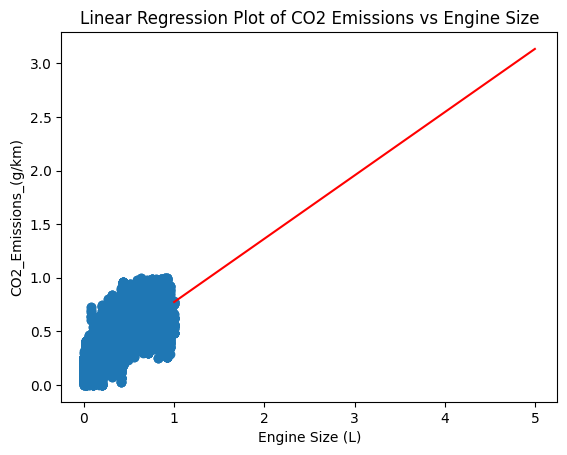

In [198]:
# Create a scatter plot of the data
# Create a scatter plot of the data
plt.scatter(df["ENGINE_SIZE_(L)"], df["CO2_EMISSIONS"])

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(df[["ENGINE_SIZE_(L)"]], df["CO2_EMISSIONS"])

# Predict CO2 emissions for a range of engine sizes
x = pd.DataFrame({"ENGINE_SIZE_(L)": range(1, 6)})
y = model.predict(x)

# Add the regression line to the plot
plt.plot(x, y, color="red")

# Add axis labels and a title
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2_Emissions_(g/km)")
plt.title("Linear Regression Plot of CO2 Emissions vs Engine Size")

# Show the plot
plt.show()

## 2. Decision Tree

In [62]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [63]:


from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=1, max_depth=7)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9947231743505641

### Mean Squared Error

In [188]:
dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

# Fit the model on the training data
dtr.fit(X_train, y_train)

# Predict on the testing data
y_pred = dtr.predict(X_test)

# Calculate the mean squared error on the testing data
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))


# Calculate the R-squared score for the test data
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R-squared score for the test data
n = X_test.shape[0] # Number of samples
p = X_test.shape[1] # Number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the R-squared and adjusted R-squared scores to the console
print("R-squared: {:.2f}".format(r2))
print("Adjusted R-squared: {:.2f}".format(adj_r2))

Mean Squared Error: 0.00
R-squared: 1.00
Adjusted R-squared: 1.00


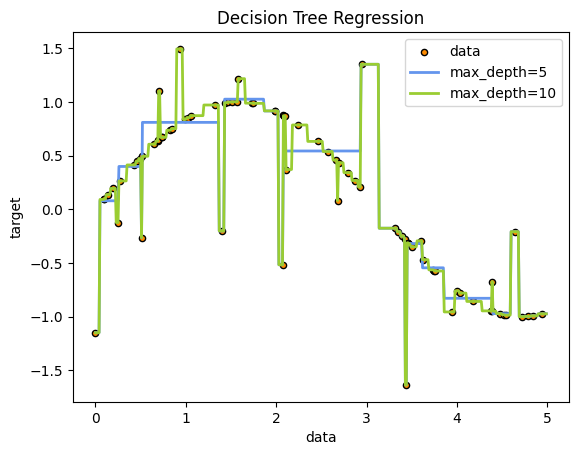

In [31]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

##  3. Random Forest Reggresion

In [37]:
from sklearn.metrics import r2_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor with desired hyperparameters
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=10)

# Fit the model on the training data
rfr.fit(X_train, y_train)

# Predict on the testing data
y_pred = rfr.predict(X_test)

# Calculate the mean squared error on the testing data
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]  # number of independent variables
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print("R-squared: {:.2f}".format(r2))
print("Adjusted R-squared: {:.2f}".format(adj_r2))

Mean Squared Error: 0.38
R-squared: 0.33
Adjusted R-squared: 0.28


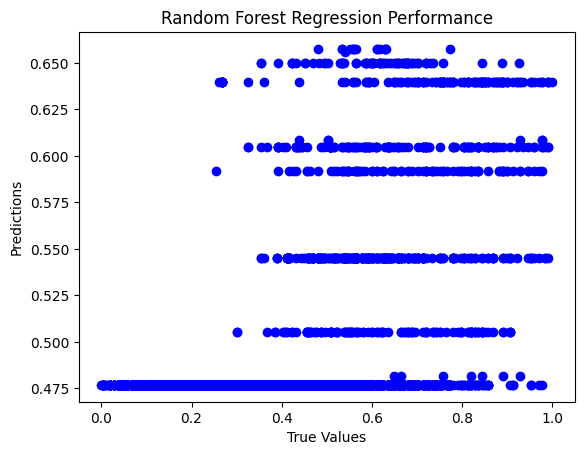

In [206]:


# Predict the target variable for the testing data
y_pred = rfr.predict(X_test)

# Plot the predicted vs true values for the testing data
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression Performance")
plt.show()

##  4. Support Vector Regression (SVR)

In [65]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Create and fit the SVR model
svr = SVR(kernel='rbf', C=1, gamma='scale')
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared
R2 = svr.score(X_test, y_test)

# Calculate the adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)

print("Mean squared error:", mse)
print("R-squared:", R2)
print("Adjusted R-squared:", adj_R2)


Mean squared error: 0.0017468331664699335
R-squared: 0.9542708251965895
Adjusted R-squared: 0.9538862087376605


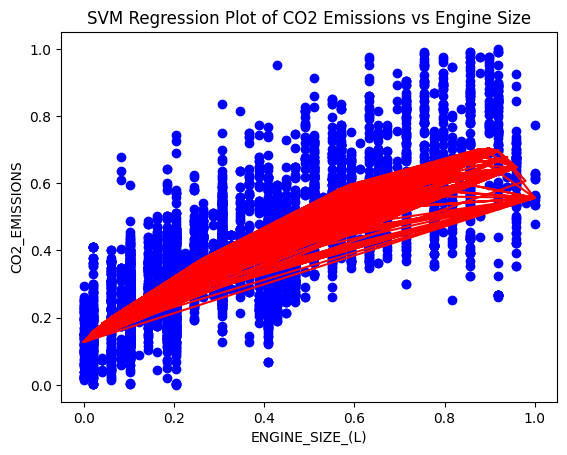

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df[["ENGINE_SIZE_(L)"]], df["CO2_EMISSIONS"], test_size=0.2)

# Create an SVM regression model with a radial basis function (RBF) kernel
model = SVR(kernel="rbf")

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot of the data and the SVM regression line
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_pred, color="red")

# Add axis labels and a title
plt.xlabel("ENGINE_SIZE_(L)")
plt.ylabel("CO2_EMISSIONS")
plt.title("SVM Regression Plot of CO2 Emissions vs Engine Size")

# Show the plot
plt.show()

##  5. KNN Regression

In [110]:
knn = KNeighborsRegressor()
z=knn.fit(X_train, y_train)
print(z)

KNeighborsRegressor()


In [111]:
print(X_test_sc)

[[-0.12459681  0.84373235  1.30926119 ... -0.03867772 -1.18210211
   1.31111824]
 [-1.56178856 -0.83969958 -1.09641441 ... -0.03867772  0.84595061
  -0.76270772]
 [ 0.13671078  1.72553002  1.30926119 ... -0.03867772 -1.18210211
   1.31111824]
 ...
 [ 0.52867217  0.12226152  0.10642339 ... -0.03867772  0.84595061
  -0.76270772]
 [-0.12459681  1.56520317  1.30926119 ... -0.03867772 -1.18210211
  -0.76270772]
 [-0.90851959 -1.24051671 -1.09641441 ... -0.03867772  0.84595061
  -0.76270772]]


# 6. Polynomial Regression

In [114]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


df2=df.copy()
X = df2.drop(['CO2_EMISSIONS'], axis= 1)
y = df2["CO2_EMISSIONS"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the training and testing data
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

# Calculate evaluation metrics for the linear regression model
train_r2 = r2_score(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_r2 = r2_score(y_test, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

# Fit a polynomial regression model to the training data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the training and testing data
train_pred_poly = poly_reg.predict(X_train_poly)
test_pred_poly = poly_reg.predict(X_test_poly)

# Calculate evaluation metrics for the polynomial regression model
train_r2_poly = r2_score(y_train, train_pred_poly)
train_rmse_poly = np.sqrt(mean_squared_error(y_train, train_pred_poly))
test_r2_poly = r2_score(y_test, test_pred_poly)
test_rmse_poly = np.sqrt(mean_squared_error(y_test, test_pred_poly))

# Create a table to display the evaluation metrics for both models
data = {'Model': ['Linear Regression', 'Polynomial Regression'], 
        'Train R-squared': [train_r2, train_r2_poly], 
        'Test R-squared': [test_r2, test_r2_poly],
        'Train RMSE': [train_rmse, train_rmse_poly],
        'Test RMSE': [test_rmse, test_rmse_poly]}
df = pd.DataFrame(data)
print(df)


                   Model  Train R-squared  Test R-squared  Train RMSE  \
0      Linear Regression         0.996204    9.964231e-01    0.011979   
1  Polynomial Regression         0.999648   -1.706877e+11    0.003646   

      Test RMSE  
0      0.011592  
1  80073.235234  


## 7. LASSO Regression

In [161]:
from sklearn.linear_model import Lasso
import math
from sklearn.metrics import mean_absolute_error as mae
lasso_model = Lasso(alpha = 0.1).fit(X_train,y_train)

lasso_model.coef_
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000)
lasso_cv_model.fit(X_train,y_train)


lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)

mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',math.sqrt(mse))
print('Mean Absolute error (MAE): ',mae(y_test,y_pred))



Mean Squared Error (MSE):  0.0124
R- Squared (R-square):  0.995946768274138
Root Mean Squared Error (RMSE):  0.11135528725660043
Mean Absolute error (MAE):  0.005601293998561537


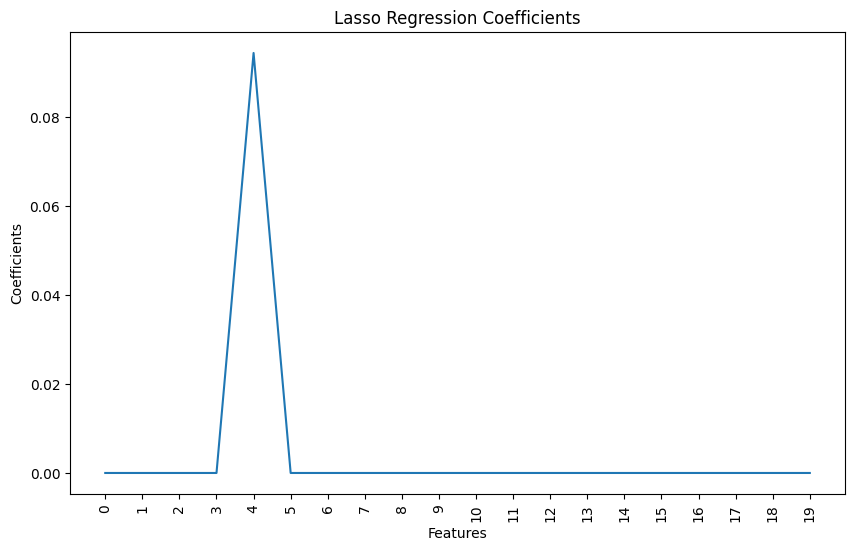

In [193]:

from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt



# Train a Lasso regression model on the data
model = Lasso(alpha=0.1)
model.fit(X, y)

# Get the coefficients of the Lasso model
coef = model.coef_

# Plot the coefficients against the corresponding feature names
plt.figure(figsize=(10, 6))
plt.plot(range(len(coef)), coef)
plt.xticks(range(len(coef)), rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.show()


# 8. Gradient Descent regression

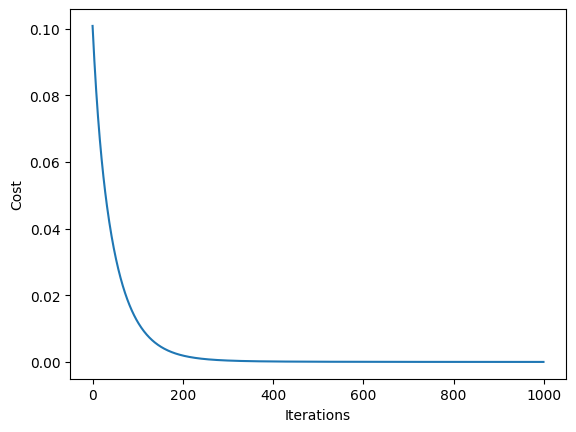

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data


# Preprocessing
X = df[['ENGINE_SIZE_(L)', 'CYLINDERS','COMB','CO2_EMISSIONS','Vehicle Class_Compact','Vehicle Class_FULL-SIZE','Vehicle Class_Full-size','Vehicle Class_MID-SIZE',
        'Vehicle Class_MINICOMPACT','Transmission_AV7','Transmission_AV8','Transmission_M4','Transmission_M5','Transmission_M6','Transmission_M7','Fuel Type_E','Fuel Type_N','Fuel Type_X','Fuel Type_Z']].values
y = df['CO2_EMISSIONS'].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # feature scaling

# Add bias term to X
X = np.insert(X, 0, 1, axis=1)

# Initialize variables
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 1000

# Define cost function and gradient
def cost_function(X, y, theta):
    m = len(y)
    h = X @ theta
    J = (1/(2*m)) * np.sum((h-y)**2)
    return J

def gradient(X, y, theta):
    m = len(y)
    h = X @ theta
    grad = (1/m) * X.T @ (h-y)
    return grad

# Gradient descent
cost_history = []
for i in range(iterations):
    cost = cost_function(X, y, theta)
    grad = gradient(X, y, theta)
    theta -= alpha * grad
    cost_history.append(cost)
    
# Plot cost vs iterations
plt.plot(np.arange(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Predict
y_pred = X @ theta


## 9. XGboost

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model using R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)


R2 score: 0.9999973100364282


In [187]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# load the data and split into training and testing sets
# assuming X_train, X_test, y_train, y_test are already defined

# train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=123)
xg_reg.fit(X_train, y_train)

# predict on test data
y_pred = xg_reg.predict(X_test)

# compute R2 and adjusted R2
n = len(y_test)
p = X_test.shape[1]
R2 = xg_reg.score(X_test, y_test)
adj_R2 = 1 - ((1-R2)*(n-1)/(n-p-1))

# compute mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Adjusted R2:", adj_R2)
print("Mean Squared Error:", mse)


Adjusted R2: 0.9999972999522161
Mean Squared Error: 1.0104592536331993e-07


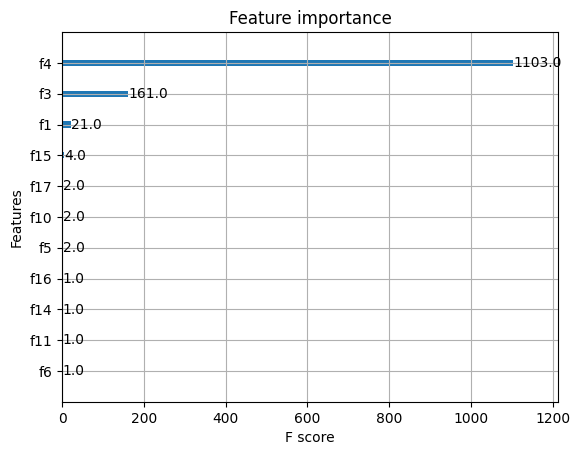

In [190]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Plot the feature importance graph
plot_importance(xgb_model)
plt.show()


# Conclusion

XGBoost R2 score: 0.9999973100364282
    Adjusted R2: 0.9999972999522161
Mean Squared Error: 1.0104592536331993e-07
    
LASSO 
Mean Squared Error (MSE):  0.0124
R- Squared (R-square):  0.995946768274138
Root Mean Squared Error (RMSE):  0.11135528725660043
Mean Absolute error (MAE):  0.005601293998561537
    
Polynomial 
                   Model  Train R-squared  Test R-squared  Train RMSE  \
0      Linear Regression         0.996204    9.964231e-01    0.011979   
1  Polynomial Regression         0.999648   -1.706877e+11    0.003646   

      Test RMSE  
0      0.011592  
1  80073.235234  

Support Vector Machine

Mean squared error: 0.0017468331664699335
R-squared: 0.9542708251965895
Adjusted R-squared: 0.9538862087376605
    
Random forest
Mean Squared Error: 0.38
R-squared: 0.33
Adjusted R-squared: 0.28

Decision Tree 

Mean Squared Error: 0.00
R-squared: 1.00
Adjusted R-squared: 1.00

All models are predicting 99% of accuracy.